# Demos: Lecture 14

In [1]:
import pennylane as qml
from pennylane import numpy as np
from lecture14_helpers import *

import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

/opt/conda/envs/pennylane/lib/python3.8/site-packages/_distutils_hack/__init__.py:30: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [2]:
n_samples = 100

X, y = make_blobs(
    n_samples=n_samples, 
    centers=[[0.1, 0.2], [0.25, 0.4]], 
    cluster_std=0.05, 
    n_features=2,
    random_state=6
)

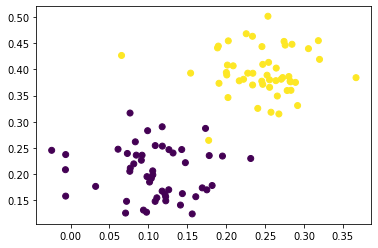

In [3]:
plot_data(X, y)

In [5]:
X = np.array(X, requires_grad=False)
y = np.array(y, requires_grad=False)

In [7]:
y[y == 0] = -1

In [8]:
y

tensor([-1, -1,  1, -1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,
         1, -1, -1,  1, -1,  1, -1, -1, -1, -1,  1,  1,  1, -1,  1,  1,
         1, -1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
         1, -1,  1,  1, -1,  1, -1, -1,  1, -1, -1,  1,  1, -1,  1,  1,
        -1,  1, -1,  1, -1, -1, -1,  1, -1,  1,  1,  1, -1, -1, -1,  1,
         1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1, -1,  1,  1, -1,  1,
         1,  1,  1, -1], requires_grad=False)

## Model 1: amplitude embedding

<img src="fig/model1.png" width="500px">

In [13]:
dev = qml.device('default.qubit', wires=1)

@qml.qnode(dev)
def model_1(point, weights):
    qml.AmplitudeEmbedding(point, wires=0, normalize=True)
    qml.Rot(*weights, wires=0)
    return qml.expval(qml.PauliX(0))

In [23]:
weights = np.random.normal(size=3)

In [24]:
weights

tensor([ 0.57977561,  0.39238897, -0.81623124], requires_grad=True)

In [25]:
model_1(X[0], weights)

tensor(0.54115749, requires_grad=True)

In [17]:
print(qml.draw(model_1, expansion_strategy="device")(X[0], weights))

 0: ──QubitStateVector(M0)──Rot(1.7, 0.452, -0.134)──┤ ⟨X⟩ 
M0 =
[0.42157193+0.j 0.90679497+0.j]



In [18]:
our_preds = make_predictions(X, model_1, weights)

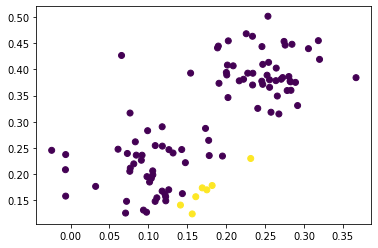

In [20]:
plot_data(X, our_preds)

In [26]:
opt = qml.GradientDescentOptimizer(stepsize=0.1)

loss = make_loss_function(X, y, model_1)

for it in range(100):
    weights, _loss = opt.step_and_cost(loss, weights)
    
    if it % 5 == 0:
        our_preds = make_predictions(X, model_1, weights)
        current_accuracy = compute_accuracy(our_preds, y)
        print(f"It {it} loss {_loss} acc {current_accuracy}")

It 0 loss 1.337331451604741 acc 0.53
It 5 loss 1.1500696790124232 acc 0.56
It 10 loss 1.0263307167065683 acc 0.63
It 15 loss 0.979113094688102 acc 0.63
It 20 loss 0.9667446181130179 acc 0.62
It 25 loss 0.9639592745930351 acc 0.61
It 30 loss 0.9633098323385325 acc 0.62
It 35 loss 0.9631071462528414 acc 0.63
It 40 loss 0.9630021048932076 acc 0.64
It 45 loss 0.9629242552027446 acc 0.64
It 50 loss 0.9628588406380765 acc 0.64
It 55 loss 0.9628021505504855 acc 0.64
It 60 loss 0.9627527235705997 acc 0.64
It 65 loss 0.9627096160394373 acc 0.64
It 70 loss 0.9626720553348984 acc 0.64
It 75 loss 0.9626393655489818 acc 0.64
It 80 loss 0.9626109473331738 acc 0.64
It 85 loss 0.9625862688091956 acc 0.64
It 90 loss 0.9625648589364024 acc 0.64
It 95 loss 0.9625463016121345 acc 0.63


## Model 2: angle embedding

<img src="fig/model2.png" width="500px">

## Model 3: multi-layer angle embedding

<img src="fig/model3.png" width="500px">